In [1]:
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from plotting import plot


ds = xr.open_dataset("/home/phyto/ModelOutput/merged/biomass_menden.nc")
ds2 = xr.open_dataset("/home/phyto/CoccoML/data/envdata_final.nc")
ds['FID'] = ds2['FID']
ds2 = None
p = plot(ds)




/home/phyto/anaconda3/envs/my-geopandas-env-2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


<module 'matplotlib.pyplot' from '/home/phyto/anaconda3/envs/my-geopandas-env-2/lib/python3.11/site-packages/matplotlib/pyplot.py'>

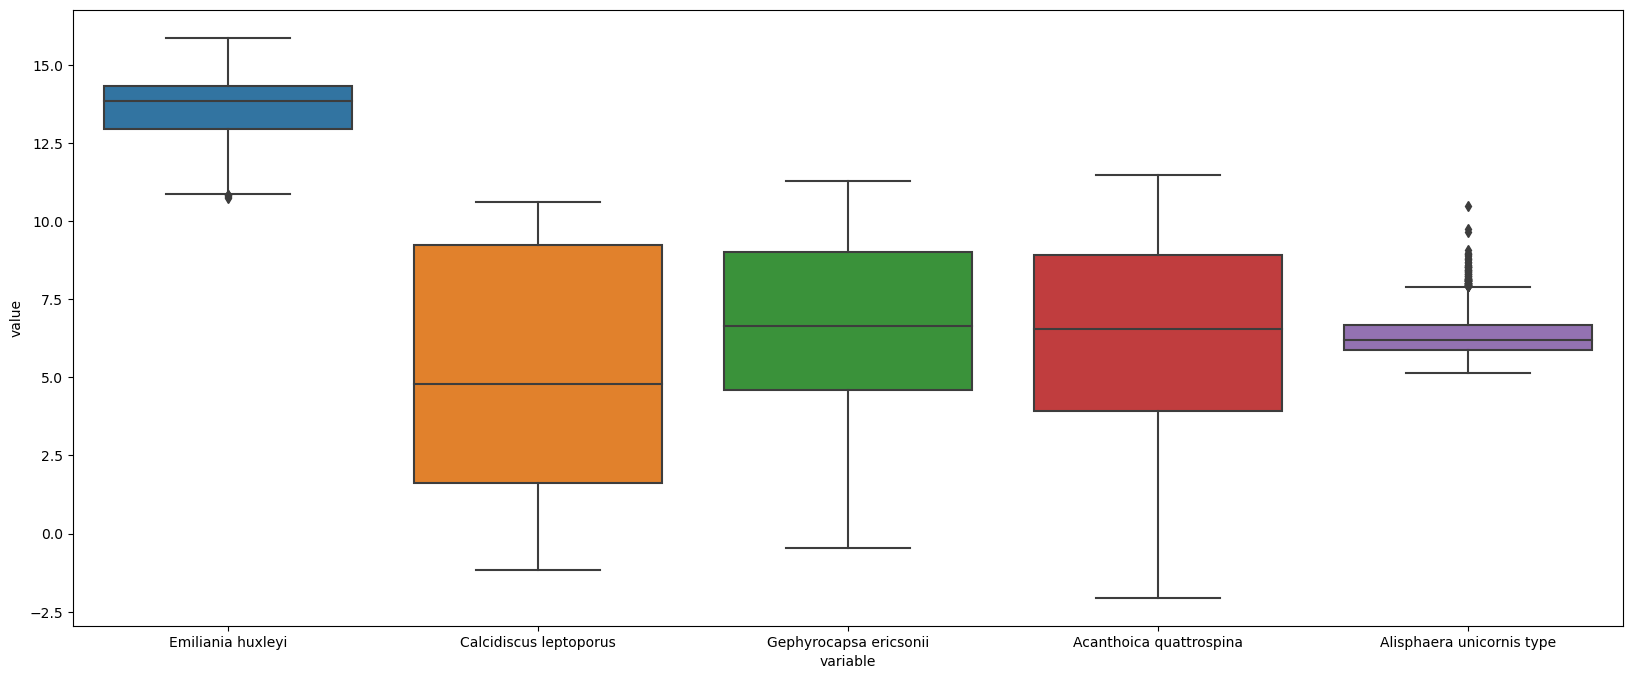

In [2]:
traits = pd.read_csv("/home/phyto/CoccoML/data/traits.csv")
region = "SANT"

p.top_spp_boxplot(traits, region, log=True)

/home/phyto/anaconda3/envs/my-geopandas-env-2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


<module 'matplotlib.pyplot' from '/home/phyto/anaconda3/envs/my-geopandas-env-2/lib/python3.11/site-packages/matplotlib/pyplot.py'>

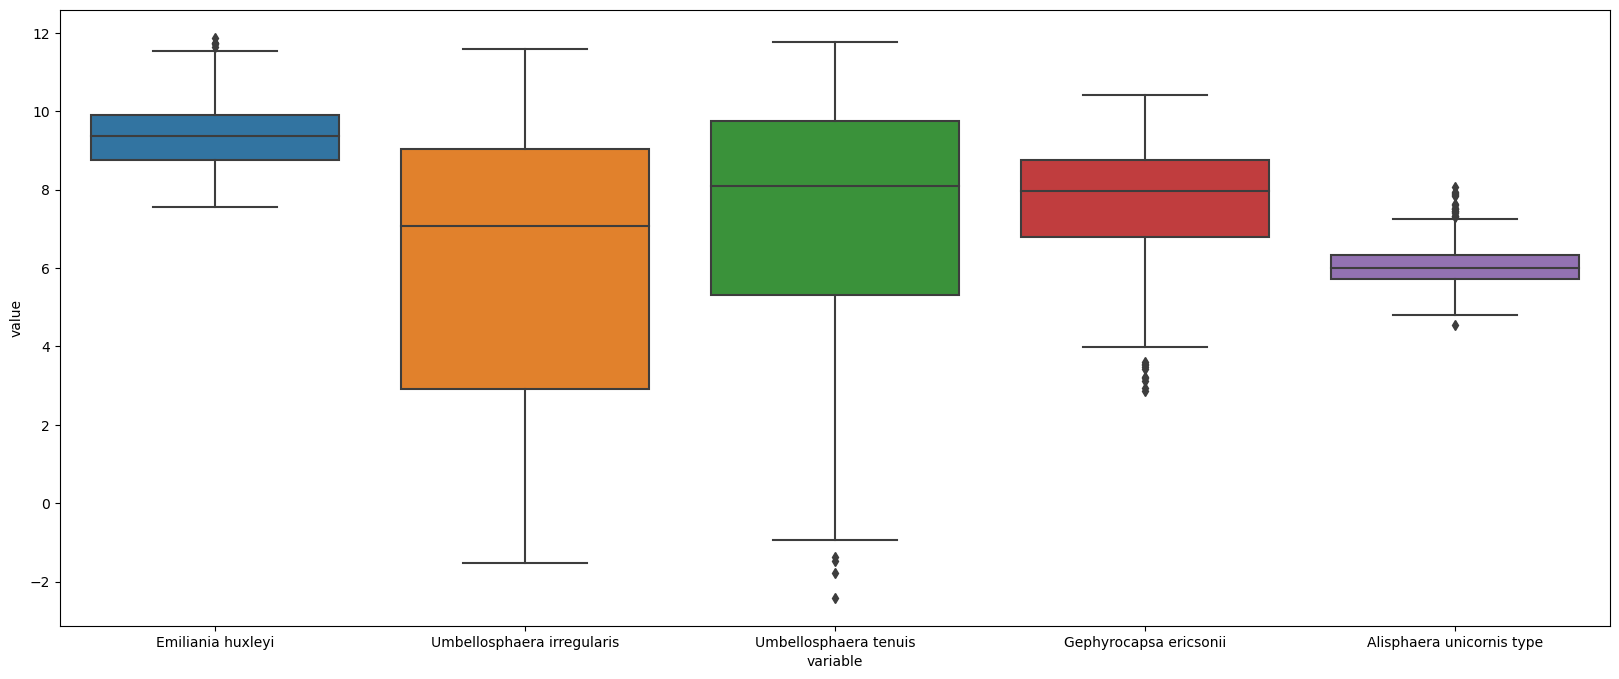

In [3]:
traits = pd.read_csv("/home/phyto/CoccoML/data/traits.csv")
region = "NPTG"

p.top_spp_boxplot(traits, region, log=True)


In [ ]:
traits = pd.read_csv("/home/phyto/CoccoML/data/traits.csv")
species = traits['species']
d.reset_index(inplace=True)
d.set_index(['lat', 'lon', 'depth', 'time', 'FID'], inplace=True)
df = d[species]
df.reset_index(inplace=True)
df = pd.melt(df, id_vars=['lat', 'lon', 'depth', 'time', 'FID'], value_vars=species)
df_sum = df.groupby('variable').sum().sort_values(by='value',ascending=False)
df_sum.reset_index(inplace=True)
top_spp = df_sum['variable'].head(5)
df_top = df.query("variable.isin(@top_spp).values")
sns.boxplot(data = df_top, y="value", x="variable")
plt.yscale('log')





In [ ]:
g = sns.FacetGrid(data=d, col="FID",  col_wrap=8, sharex=False)
d['total_log'] = np.log(d['total'])
g.map_dataframe(sns.boxplot, x="total_log")
#sns.boxplot(data=d, x="total")